In [370]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

dt_frame = pd.read_csv('tedtalks.csv')

In [371]:
dt_frame.head()

,title,description,keywords,date,duration,views,n_lang,lang,speaker,speaker_job,speaker_about,n_comments
0,A powerful way to unleash your natural creativity,What can we learn from the world's most enduri...,"creativity, mind, success, productivity, motiv...",November 2018,1041.0,145837,5,en | pt-BR | es | zh-Hans | ar,Tim Harford,"Economist, journalist, broadcaster",Tim Harford's writings reveal the economic ide...,2.0
1,The disarming case to act right now on climate,Stockholm native Greta Thunberg first heard ab...,"sustainability, climate change, education",November 2018,0.0,0,8,en | nl | it | sk | fr | de | hr | cs,Greta Thunberg,Greta Thunberg,Greta is a 15-year-old Stockholm native who li...,NaN
2,"""Autopilote"" / ""Pumper""","Singing in French and English, Mai Lan brings ...","music, live music, performance art, performance",September 2018,548.0,16441,1,en,Mai Lan,Artist,Mai Lan is a French-Vietnamese artist and musi...,NaN
3,How CRISPR lets you edit DNA,From the smallest single-celled organism to th...,"animation, DNA, TED-Ed, CRISPR, biology, inven...",January 2019,311.0,0,1,en,Andrea M. Henle,Educator,NaN,NaN
4,"Stunning buildings made from raw, imperfect ma...",What would it take to reimagine the limits of ...,"architecture, creativity, design, technology, ...",November 2018,728.0,51666,1,en,Débora Mesa Molina,Architect,Débora Mesa Molina makes space for experiment...,3.0


In [372]:
dt_frame['year'] = dt_frame['date'].str[-4:]
dt_frame['month'] = dt_frame['date'].apply(lambda x: x[:len(x)-5])
dt_frame = dt_frame.replace(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],['01','02','03','04','05','06','07','08','09','10','11','12'])
dt_frame['month'] = dt_frame['month']+'/'+dt_frame['year']
dt_frame.columns = dt_frame.columns.str.replace('month','date_new_format')
dt_frame['year'] = dt_frame['year'].apply(lambda x: int(x))
dt_frame['duration_min'] = dt_frame['duration'] / 60
dt_frame.head()

,title,description,keywords,date,duration,views,n_lang,lang,speaker,speaker_job,speaker_about,n_comments,year,date_new_format,duration_min
0,A powerful way to unleash your natural creativity,What can we learn from the world's most enduri...,"creativity, mind, success, productivity, motiv...",November 2018,1041.0,145837,5,en | pt-BR | es | zh-Hans | ar,Tim Harford,"Economist, journalist, broadcaster",Tim Harford's writings reveal the economic ide...,2.0,2018,11/2018,17.350000
1,The disarming case to act right now on climate,Stockholm native Greta Thunberg first heard ab...,"sustainability, climate change, education",November 2018,0.0,0,8,en | nl | it | sk | fr | de | hr | cs,Greta Thunberg,Greta Thunberg,Greta is a 15-year-old Stockholm native who li...,NaN,2018,11/2018,0.000000
2,"""Autopilote"" / ""Pumper""","Singing in French and English, Mai Lan brings ...","music, live music, performance art, performance",September 2018,548.0,16441,1,en,Mai Lan,Artist,Mai Lan is a French-Vietnamese artist and musi...,NaN,2018,09/2018,9.133333
3,How CRISPR lets you edit DNA,From the smallest single-celled organism to th...,"animation, DNA, TED-Ed, CRISPR, biology, inven...",January 2019,311.0,0,1,en,Andrea M. Henle,Educator,NaN,NaN,2019,01/2019,5.183333
4,"Stunning buildings made from raw, imperfect ma...",What would it take to reimagine the limits of ...,"architecture, creativity, design, technology, ...",November 2018,728.0,51666,1,en,Débora Mesa Molina,Architect,Débora Mesa Molina makes space for experiment...,3.0,2018,11/2018,12.133333


In [431]:
df_speaker=dt_frame.groupby('speaker')[['title']].count()
df_speaker=df_speaker[df_speaker.title > 4]
speaker_list=df_speaker.index
df_speaker=dt_frame[dt_frame['speaker'].isin(speaker_list)]
df_speaker.groupby(['speaker','speaker_job','year'])

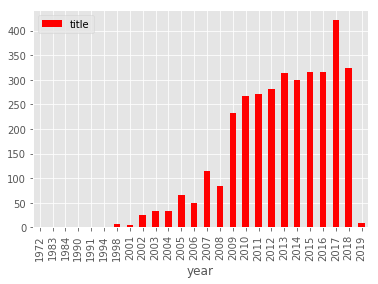

In [356]:
#dt_frame.groupby('year').agg({'title':'count'}).sort_values(by = 'year', ascending = False).plot.bar
videos_per_year = dt_frame.groupby('year').agg({'title':'count'})
videos_per_year.sort_values(by='year', ascending = True).plot(kind='bar',y='title', color = 'r')

In [357]:
dt_frame[dt_frame.year < 1984]

,title,description,keywords,date,duration,views,n_lang,lang,speaker,speaker_job,speaker_about,n_comments,year,date_new_format,date_new_format,duration_min
2784,Why believe in others,"In this rare clip from 1972, legendary psychia...","[humanity, mind, peace, psychology, war]",May 1972,0.0,1262970,0,NaN,Viktor Frankl,"Psychiatrist, neurologist, author",Neurologist and psychiatrist Viktor Frankl pio...,377.0,1972,05/1972,05/1972,0.0
2841,Physics is fun to imagine,"In this archival footage from BBC TV, celebrat...","[astronomy, physics, science]",July 1983,0.0,621451,0,NaN,Richard Feynman,Physicist,One of the best known and most renowned scient...,148.0,1983,07/1983,07/1983,0.0


In [358]:
dt_frame.sort_values(by = 'views', ascending = False)

,title,description,keywords,date,duration,views,n_lang,lang,speaker,speaker_job,speaker_about,n_comments,year,date_new_format,date_new_format,duration_min
3467,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,"[children, creativity, culture, dance, educati...",February 2006,1164.0,55734911,61,pt-BR | el | eo | en | vi | ca | it | sv | cs ...,Sir Ken Robinson,Author/educator,Creativity expert Sir Ken Robinson challenges ...,4661.0,2006,02/2006,02/2006,19.400000
2125,Your body language may shape who you are,"Body language affects how others see us, but i...","[body language, brain, business, psychology, s...",June 2012,1262.0,50740514,51,el | vi | ca | it | ar | pt-BR | mk | cs | gl ...,Amy Cuddy,Social psychologist,Amy Cuddy’s research on body language reveals ...,2386.0,2012,06/2012,06/2012,21.033333
1356,This is what happens when you reply to spam email,"Suspicious emails: unclaimed insurance bonds, ...","[comedy, curiosity, communication, humor, tech...",December 2015,588.0,42611206,45,el | en | zh | vi | it | ar | pt-BR | cs | gl ...,James Veitch,Comedian and writer,"For James Veitch, a British writer and comedia...",184.0,2015,12/2015,12/2015,9.800000
2793,How great leaders inspire action,Simon Sinek has a simple but powerful model fo...,"[TEDx, business, entrepreneur, leadership, suc...",September 2009,1084.0,42388149,48,el | eo | vi | ca | it | ar | pt-BR | bg | cs ...,Simon Sinek,Leadership expert,Simon Sinek explores how leaders can inspire c...,1993.0,2009,09/2009,09/2009,18.066667
2633,The power of vulnerability,Brené Brown studies human connection — our abi...,"[TEDx, communication, culture, depression, fea...",June 2010,1219.0,37976333,52,el | en | vi | ca | it | cs | ar | pt-BR | bg ...,Brené Brown,Vulnerability researcher,"Brené Brown studies vulnerability, courage, au...",1997.0,2010,06/2010,06/2010,20.316667
1695,How to speak so that people want to listen,"Have you ever felt like you're talking, but no...","[culture, sound, speech]",June 2013,598.0,32381299,46,gl | el | vi | ca | it | ar | pt-BR | uk | bg ...,Julian Treasure,Sound consultant,Julian Treasure studies sound and advises busi...,336.0,2013,06/2013,06/2013,9.966667
1308,Inside the mind of a master procrastinator,Tim Urban knows that procrastination doesn't m...,"[brain, comedy, decision-making, entertainment...",February 2016,843.0,27155144,42,id | mn | el | en | vi | ca | it | pt-BR | cs ...,Tim Urban,Blogger,"With Wait But Why, Tim Urban demonstrates that...",402.0,2016,02/2016,02/2016,14.050000
553,My philosophy for a happy life,Born with a rare genetic disorder called proge...,"[life, happiness, personal growth, self, motiv...",October 2013,0.0,26220957,33,el | en | be | vi | it | ar | pt-BR | es | ru ...,Sam Berns,Activist,"Before his death in 2014, Sam Berns was a musi...",NaN,2013,10/2013,10/2013,0.000000
3018,10 things you didn't know about orgasm,"""Bonk"" author Mary Roach delves into obscure s...","[culture, history, humor, science, sex, writin...",February 2009,1003.0,25938310,38,el | en | vi | ca | it | ar | pt-BR | cs | et ...,Mary Roach,Writer,"Death, the afterlife, and now sex -- Mary Roac...",374.0,2009,02/2009,02/2009,16.716667
2055,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell admits she won “a genetic lott...,"[TEDx, beauty, culture, fashion, photography]",October 2012,577.0,25634265,44,el | en | vi | ca | it | hy | pt-BR | cs | id ...,Cameron Russell,Model,Cameron Russell has stomped the runways for Vi...,877.0,2012,10/2012,10/2012,9.616667


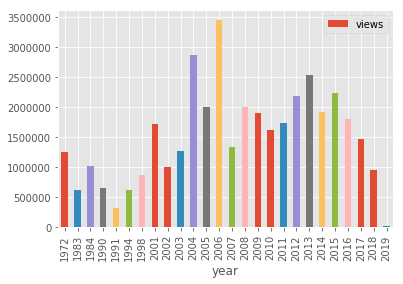

In [399]:
df_nozeros = dt_frame[dt_frame.views != 0]
year_views = df_nozeros.groupby(['year'])[['views']].mean().reset_index()
year_views.plot(kind='bar',x='year', y='views')


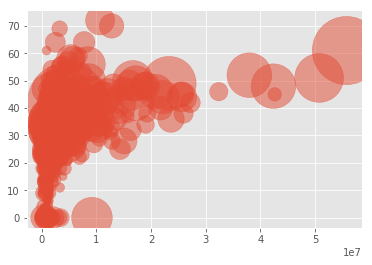

In [400]:
plt.scatter(x=dt_frame['views'], y=df_nozeros['n_lang'], s=df_nozeros['n_comments'], alpha=0.5)

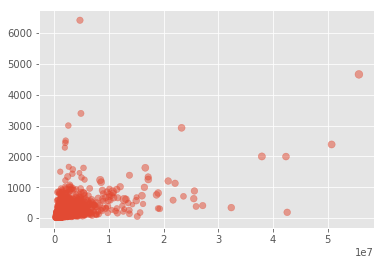

In [401]:
plt.scatter(x=df_nozeros['views'], y=df_nozeros['n_comments'], s=df_nozeros['n_lang'], alpha=0.5)

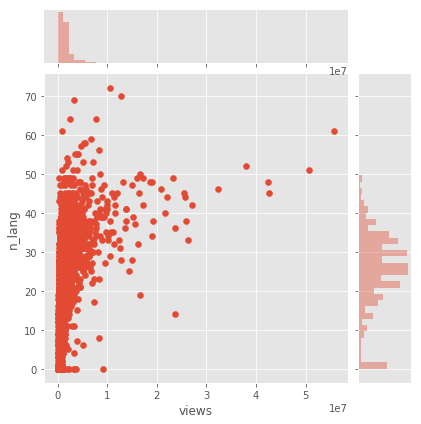

In [402]:

sns.jointplot(df_nozeros['views'], df_nozeros['n_lang'])

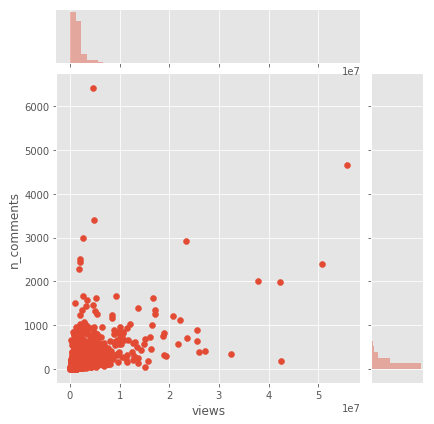

In [403]:

sns.jointplot(df_nozeros['views'], df_nozeros['n_comments'])

/Users/jamestella/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


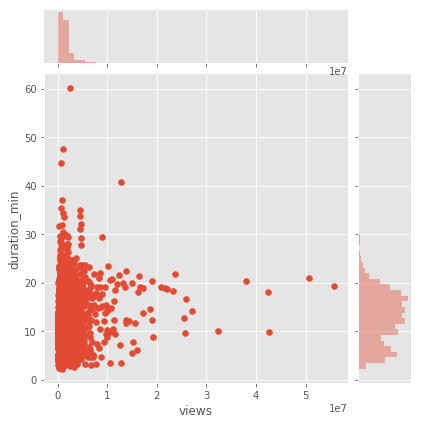

In [404]:
df_filter_duration = df_nozeros[dt_frame['duration_min'] != 0]
sns.jointplot(df_filter_duration['views'], df_filter_duration['duration_min'])

In [405]:
df_nozeros['views'].mean()

1839156.0777743622

In [418]:
dt_frame.speaker_job = dt_frame.speaker_job.apply(lambda x: str(x).split(', '))

index=0
list_ = []
for item in dt_frame.speaker_job:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
speaker_job = pd.DataFrame(list_, columns=['index', 'speaker_job'])
speaker_job.head()

,index,speaker_job
0,0,Economist
1,0,journalist
2,0,broadcaster
3,1,Greta Thunberg
4,2,Artist


In [ ]:
df_keywords = pd.merge(dt_frame.drop('keywords', axis=1), keywords, how='right', left_index=True, right_on='index')
df_keywords.head()

In [373]:
dt_frame.keywords = dt_frame.keywords.apply(lambda x: x.split(', '))

index=0
list_ = []
for item in dt_frame.keywords:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
keywords = pd.DataFrame(list_, columns=['index', 'keywords'])
keywords.head()

,index,keywords
0,0,creativity
1,0,mind
2,0,success
3,0,productivity
4,0,motivation


In [375]:
len(keywords.keywords.unique())

448

In [243]:
df_keywords = pd.merge(dt_frame.drop('keywords', axis=1), keywords, how='right', left_index=True, right_on='index')
df_keywords.head()

,title,description,date,duration,views,n_lang,lang,speaker,speaker_job,speaker_about,n_comments,year,date_new_format,index,keywords
0,A powerful way to unleash your natural creativity,What can we learn from the world's most enduri...,November 2018,1041.0,145837,5,en | pt-BR | es | zh-Hans | ar,Tim Harford,"Economist, journalist, broadcaster",Tim Harford's writings reveal the economic ide...,2.0,2018,11/2018,0,creativity
1,A powerful way to unleash your natural creativity,What can we learn from the world's most enduri...,November 2018,1041.0,145837,5,en | pt-BR | es | zh-Hans | ar,Tim Harford,"Economist, journalist, broadcaster",Tim Harford's writings reveal the economic ide...,2.0,2018,11/2018,0,mind
2,A powerful way to unleash your natural creativity,What can we learn from the world's most enduri...,November 2018,1041.0,145837,5,en | pt-BR | es | zh-Hans | ar,Tim Harford,"Economist, journalist, broadcaster",Tim Harford's writings reveal the economic ide...,2.0,2018,11/2018,0,success
3,A powerful way to unleash your natural creativity,What can we learn from the world's most enduri...,November 2018,1041.0,145837,5,en | pt-BR | es | zh-Hans | ar,Tim Harford,"Economist, journalist, broadcaster",Tim Harford's writings reveal the economic ide...,2.0,2018,11/2018,0,productivity
4,A powerful way to unleash your natural creativity,What can we learn from the world's most enduri...,November 2018,1041.0,145837,5,en | pt-BR | es | zh-Hans | ar,Tim Harford,"Economist, journalist, broadcaster",Tim Harford's writings reveal the economic ide...,2.0,2018,11/2018,0,motivation


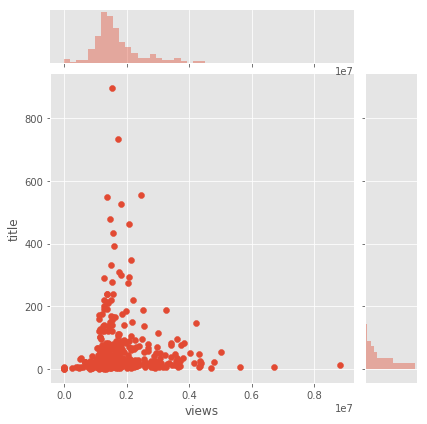

In [389]:
views_title=df_keywords.groupby(['keywords']).agg({'views': 'mean', 'title': 'count'}).sort_values(by = 'views', ascending = False)
sns.jointplot(views_title['views'], views_title['title'])
#views_title

In [391]:
views_title[views_title.views > 4000000]

,views,title
keywords,,
body language,8.827407e+06,12
introvert,6.717924e+06,6
mindfulness,5.632883e+06,5
success,5.021557e+06,53
time,4.792291e+06,21
evil,4.705632e+06,2
magic,4.387037e+06,19
String theory,4.349313e+06,10
productivity,4.330050e+06,26


In [394]:
views_title[views_title.title > 400].sort_values(by = 'title', ascending = False)

,views,title
keywords,,
technology,1.530273e+06,897
science,1.729308e+06,735
culture,2.474622e+06,556
global issues,1.383985e+06,548
TEDx,1.812578e+06,526
design,1.456694e+06,480
business,2.064136e+06,463
society,1.580135e+06,435


In [406]:
filter_=(df_keywords.year > 2007) & (df_keywords.year < 2019)
kw_freq=df_keywords[df_keywords != 'TEDx'].groupby('keywords')['title'].count().nlargest(7)
kw_freq_list=kw_freq.index
kw_freq=df_keywords[df_keywords['keywords'].isin(kw_freq_list)]
kw_freq_list

Index(['technology', 'science', 'culture', 'global issues', 'design',
       'business', 'society', 'social change'],
      dtype='object', name='keywords')

In [433]:
kw_year_freq=kw_freq.groupby(['year','keywords'])['title'].count()
kw_year_freq=kw_year_freq.groupby(level='year').nlargest(7).reset_index(level=0, drop=True)
kw_year_freq=kw_year_freq.to_frame().reset_index()
#kw_year_freq.pivot(index='year', columns='keywords', values='title').plot(kind='bar')
#print(type(kw_year))
kw_year

year  keywords     
2001  culture            2
      life               2
2002  technology        11
      design            10
2003  technology        13
      science           12
2004  culture           15
      entertainment     11
2005  culture           34
      technology        29
2006  culture           27
      global issues     16
2007  technology        51
      global issues     43
2008  entertainment     29
      science           28
2009  technology        77
      science           56
2010  science           68
      culture           67
2011  TEDx              96
      technology        88
2012  TEDx              88
      technology        75
2013  technology        77
      culture           56
2014  technology        58
      business          36
2015  science           60
      technology        60
2016  society          112
      humanity          89
2017  society          147
      social change    121
2018  society           77
      science           76
2019  TE

In [321]:
kw_year=df_keywords[df_keywords.year > 2000].groupby(['year','keywords'])['title'].count()
kw_year=kw_year.groupby(level='year').nlargest(2).reset_index(level=0, drop=True)
kw_year

year  keywords     
2001  culture            2
      life               2
2002  technology        11
      design            10
2003  technology        13
      science           12
2004  culture           15
      entertainment     11
2005  culture           34
      technology        29
2006  culture           27
      global issues     16
2007  technology        51
      global issues     43
2008  entertainment     29
      science           28
2009  technology        77
      science           56
2010  science           68
      culture           67
2011  TEDx              96
      technology        88
2012  TEDx              88
      technology        75
2013  technology        77
      culture           56
2014  technology        58
      business          36
2015  science           60
      technology        60
2016  society          112
      humanity          89
2017  society          147
      social change    121
2018  society           77
      science           76
2019  TE

keywords
society            77
science            76
TED-Ed             73
technology         66
social change      64
humanity           51
future             44
history            43
community          41
personal growth    35
Name: title, dtype: int64


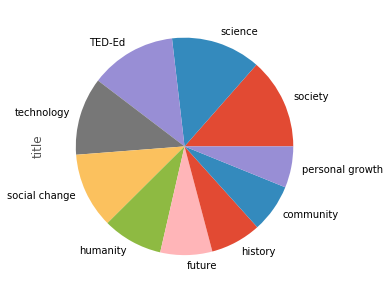

In [262]:
kw_2018=df_keywords[df_keywords.year == 2018].groupby(['keywords'])['title'].count().sort_values(ascending = False).nlargest(10)
#kw_2018=kw_year.groupby(level='year').nlargest(5).reset_index(level=0, drop=True)
plot = kw_2018.plot.pie(figsize=(5, 5))
print(kw_2018)

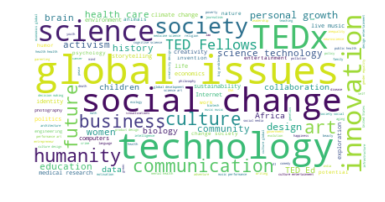

In [199]:
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt
    import numpy as np
    from PIL import Image

    text = ("")
    for item in df_keywords['keywords']:
        text = text + "|" + item

    ted_mask = np.array(Image.open("ted_logo.png"))

    # Make the figure
    wc = WordCloud(background_color="white").generate(text)
    #wc.generate_from_frequencies(text)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()
